# Time Series Classification Algorithms - (7) Deep Learning Based

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on official <a href="https://www.aeon-toolkit.org/en/latest/examples.html" target="_blank">aeon tutorials</a>, and parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

from sklearn import metrics

import time

In [3]:
from aeon.datasets import load_classification
from aeon.utils.discovery import all_estimators

# all_estimators("classifier", tag_filter={"algorithm_type": "deeplearning"})

In [4]:
from aeon.classification.deep_learning import (
    InceptionTimeClassifier,
    LITETimeClassifier,
    MLPClassifier,
    ResNetClassifier,
    TimeCNNClassifier
)

/Users/zamith/Doutorado/TSC_XAI_Notebooks/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
DATASET_NAMES = [
    "MelbournePedestrian",
    "ArrowHead",
    "Colposcopy"
]

X_train_dict, y_train_dict = {}, {}
X_test_dict, y_test_dict = {}, {}

accuracy_dict, f1_score_dict, duration_dict = {}, {}, {}

for dataset_name in DATASET_NAMES: 
    X_train_dict[dataset_name], y_train_dict[dataset_name] = load_classification(
        dataset_name, split="train"
    )
    X_test_dict[dataset_name], y_test_dict[dataset_name] = load_classification(
        dataset_name, split="test"
    )

    X_train_dict[dataset_name] = X_train_dict[dataset_name].squeeze(1)
    X_test_dict[dataset_name] = X_test_dict[dataset_name].squeeze(1)

    accuracy_dict[dataset_name] = {}
    f1_score_dict[dataset_name] = {}
    duration_dict[dataset_name] = {}

## 1. Multi-Layer Perceptron (MLP)

```bibtex
@inproceedings{wang2017,
  author = {Zhiguang Wang and Weizhong Yan and Tim Oates},
  title = {Time Series Classification from Scratch with Deep Neural Networks: A Strong Baseline},
  booktitle = {Proceedings of the International Joint Conference on Neural Networks (IJCNN)},
  year = {2017},
  pages = {1578--1585},
  publisher = {IEEE},
  doi = {10.1109/IJCNN.2017.7966039},
  url = {https://doi.org/10.1109/IJCNN.2017.7966039}
}
```

Proposed by \cite{wang2017}.

In [6]:
N_EPOCHS = 500
method = "MLP"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    mlp = MLPClassifier(n_epochs=N_EPOCHS)
    mlp.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    mlp_preds = mlp.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], mlp_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], mlp_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

MLP
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.51
F1-Score: 0.45
Duration: 91.57 seconds
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.51
F1-Score: 0.49
Duration: 11.97 seconds
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.31
F1-Score: 0.20
Duration: 17.70 seconds


## 2. Residual Neural Network (ResNet)

Proposed by \cite{wang2017}.

```bibtex
@article{middlehurst2024,
  author = {Middlehurst, Matthew and Sch{\"a}fer, Patrick and Bagnall, Anthony},
  title = {Bake Off Redux: A Review and Experimental Evaluation of Recent Time Series Classification Algorithms},
  journal = {Data Mining and Knowledge Discovery},
  volume = {38},
  pages = {1958--2031},
  year = {2024},
  doi = {10.1007/s10618-024-01022-1},
  url = {https://doi.org/10.1007/s10618-024-01022-1}
}
```

"The Residual Network (ResNet), is a deep learning architecture that has been successfully adapted for time series analysis. ResNet is composed of three residual blocks, each comprising two main components: (a) three convolutional layers that extract features from the input data followed by batch normalization and a ReLu non-linear activation function, and (b) a shortcut connection that allows the direct propagation of information from earlier layers to later ones. The shortcut connection is designed to mitigate the vanishing gradients problem for deep neural networks, and the convolutional layers extract features from time series data. At the end of the model, the features are passed through one Global Average Pooling (GAP) and one fully-connected softmax layer is used with the number of neurons equal to the number of classes." \cite{middlehurst2024}

In [8]:
method = "ResNet"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    resnet = ResNetClassifier(n_epochs=N_EPOCHS)
    resnet.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    resnet_preds = resnet.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], resnet_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], resnet_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

ResNet
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 324.92 seconds
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.58
F1-Score: 0.59
Duration: 131.51 seconds
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.23
F1-Score: 0.23
Duration: 209.37 seconds


## 3. InceptionTime

```bibtex
@article{fawaz2020,
  author = {Hassan Ismail Fawaz and Brendan Lucas and Germain Forestier and Camille Pelletier and Daniel F. Schmidt and Jonathan Weber and François Petitjean and Pierre-Alain Muller},
  title = {InceptionTime: Finding AlexNet for Time Series Classification},
  journal = {Data Mining and Knowledge Discovery},
  volume = {34},
  number = {6},
  pages = {1936--1962},
  year = {2020},
  publisher = {Springer},
  doi = {10.1007/s10618-020-00710-y},
  url = {https://doi.org/10.1007/s10618-020-00710-y}
}
```

Proposed by \cite{fawaz2020}.


```bibtex
@inbook{faouzi2024,
  author = {Johann Faouzi},
  title = {Time Series Classification: A Review of Algorithms and Implementations},
  year = {2024},
  month = {March},
  booktitle = {Advances in Time Series Analysis and Forecasting},
  publisher = {IntechOpen},
  isbn = {978-0-85466-053-7},
  doi = {10.5772/intechopen.1004810},
}
```

"InceptionTime is probably the main deep learning model for time series classification. InceptionTime is a neural network ensemble consisting of five Inception networks. Consisting of blocks of three Inception modules (6 blocks by default), followed by a global averaging pooling layer and a fully-connected layer with the softmax activation function. Each Inception module consists of convolutions with kernels of several sizes followed by batch normalization and the rectified linear unit activation function." \cite{faouzi2024}

In [9]:
method = "InceptionTime"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    it = InceptionTimeClassifier(n_epochs=N_EPOCHS)
    it.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    it_preds = it.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], it_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], it_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

InceptionTime
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 1832.50 seconds
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.75
F1-Score: 0.75
Duration: 576.11 seconds
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.35
F1-Score: 0.29
Duration: 980.87 seconds


## 4. LITETime

```bibtex
@inproceedings{fawaz2023,
  author = {Abdelrahman Ismail-Fawaz and Mickael Devanne and Stefano Berretti and Jonathan Weber and François Petitjean and Hassan Ismail Fawaz},
  title = {LITE: Light Inception with Boosting Techniques for Time Series Classification},
  booktitle = {Proceedings of the 2023 IEEE 10th International Conference on Data Science and Advanced Analytics (DSAA)},
  year = {2023},
  pages = {1--10},
  publisher = {IEEE}
}
```

Proposed by \cite{fawaz2023}.

"Both ResNet and Inception have approximately 500k trainable parameters and are computationally intensive. In 2023, \cite{fawaz2023} proposed a smaller model for InceptionTime, called Light Inception with boosTing tEchniques (LITE). LITETime uses the DepthWise Separable Convolutions in order to signiﬁcantly reduce the number of parameters while using boosting techniques to balance the trade off between complexity and performance. These boosting techniques are multiplexing convolution, dilated convolution and hand-crafted-ﬁlters. Multiplexing convolution is the approach ofapplying multiple convolution layers in parallel ofdifferent kernel size, motivated from Inception. The usage of dilated convolution is motivated from the fact of it boosting many TSC models in the literature, such as ROCKET. The LITETime ensemble of ﬁve base models is not signiﬁcantly worse than full InceptionTime, but much faster." \cite{middlehurst2024}

In [10]:
method = "LITETime"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    lite = LITETimeClassifier(n_epochs=N_EPOCHS)
    lite.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    lite_preds = lite.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], lite_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], lite_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

LITETime
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 281.26 seconds
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.79
F1-Score: 0.79
Duration: 148.11 seconds
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.32
F1-Score: 0.27
Duration: 149.26 seconds


## 5. Time Convolutional Neural Network (CNN)

```bibtex
@article{zhao2017,
  author = {Bo Zhao and Liuyang Lu and Shenghong Li and Weidong Wang},
  title = {Convolutional Neural Networks for Time Series Classification},
  journal = {Journal of Systems Engineering and Electronics},
  volume = {28},
  number = {1},
  pages = {162--169},
  year = {2017},
  publisher = {Elsevier},
  doi = {10.21629/JSEE.2017.01.20},
  url = {https://doi.org/10.21629/JSEE.2017.01.20}
}
```

Proposed by \cite{zhao2017}.

In [11]:
method = "TimeCNN"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    cnn = TimeCNNClassifier(n_epochs=N_EPOCHS)
    cnn.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    cnn_preds = cnn.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], cnn_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], cnn_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

TimeCNN
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.88
F1-Score: 0.88
Duration: 23.42 seconds
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.54
F1-Score: 0.49
Duration: 12.30 seconds
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.36
F1-Score: 0.34
Duration: 13.78 seconds


## 6. Comparison between the Classifiers

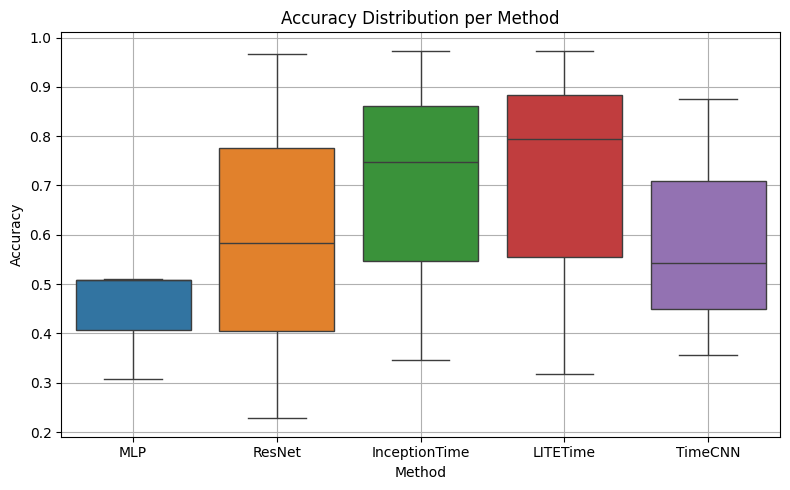

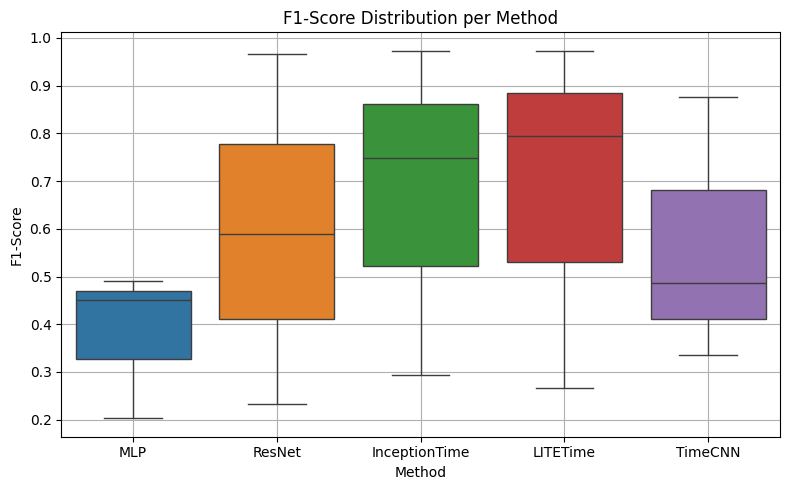

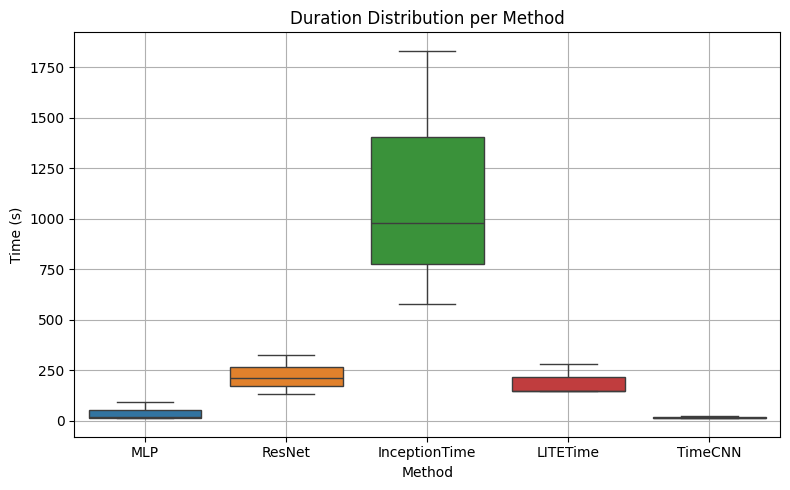

In [12]:
datasets = list(accuracy_dict.keys())
methods = list(next(iter(accuracy_dict.values())).keys())

def prepare_long_format(metric_dict, metric_name):
    records = []
    for ds in datasets:
        for method in methods:
            val = metric_dict[ds][method]
            if isinstance(val, (int, float)):
                records.append({
                    "Dataset": ds,
                    "Method": method,
                    "Metric": float(val),
                    "Type": metric_name
                })
    return pd.DataFrame(records)

df_accuracy = prepare_long_format(accuracy_dict, "Accuracy")
df_f1 = prepare_long_format(f1_score_dict, "F1-Score")
df_duration = prepare_long_format(duration_dict, "Duration (s)")

df_all = pd.concat([df_accuracy, df_f1, df_duration], ignore_index=True)

def plot_boxplot(df, title, ylabel):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Method", y="Metric", hue="Method")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Method")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_boxplot(df_accuracy, "Accuracy Distribution per Method", "Accuracy")
plot_boxplot(df_f1, "F1-Score Distribution per Method", "F1-Score")
plot_boxplot(df_duration, "Duration Distribution per Method", "Time (s)")